# CAPSTONE:

# SpaceX Falcon 9 First Stage Landing Prediction

## Lab 4:

## Assignment: Exploring and Preparing Data

In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform *Exploratory Data Analysis and Feature Engineering.*

## Objectives:

Perform Exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering

### Import Libraries and Define Auxiliary Functions

In [1]:
# Import required libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis (EDA)

First, let's read the SpaceX dataset into a Pandas dataframe and print its summary

In [2]:
!curl -o dataset_part_2_csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv

df=pd.read_csv('dataset_part_2_csv')

df.head(5)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12100  100 12100    0     0  24646      0 --:--:-- --:--:-- --:--:-- 24643


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's check how the `FlightNumber` (indicating the continuous launch attempts) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. 

We see that *as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will fail.*

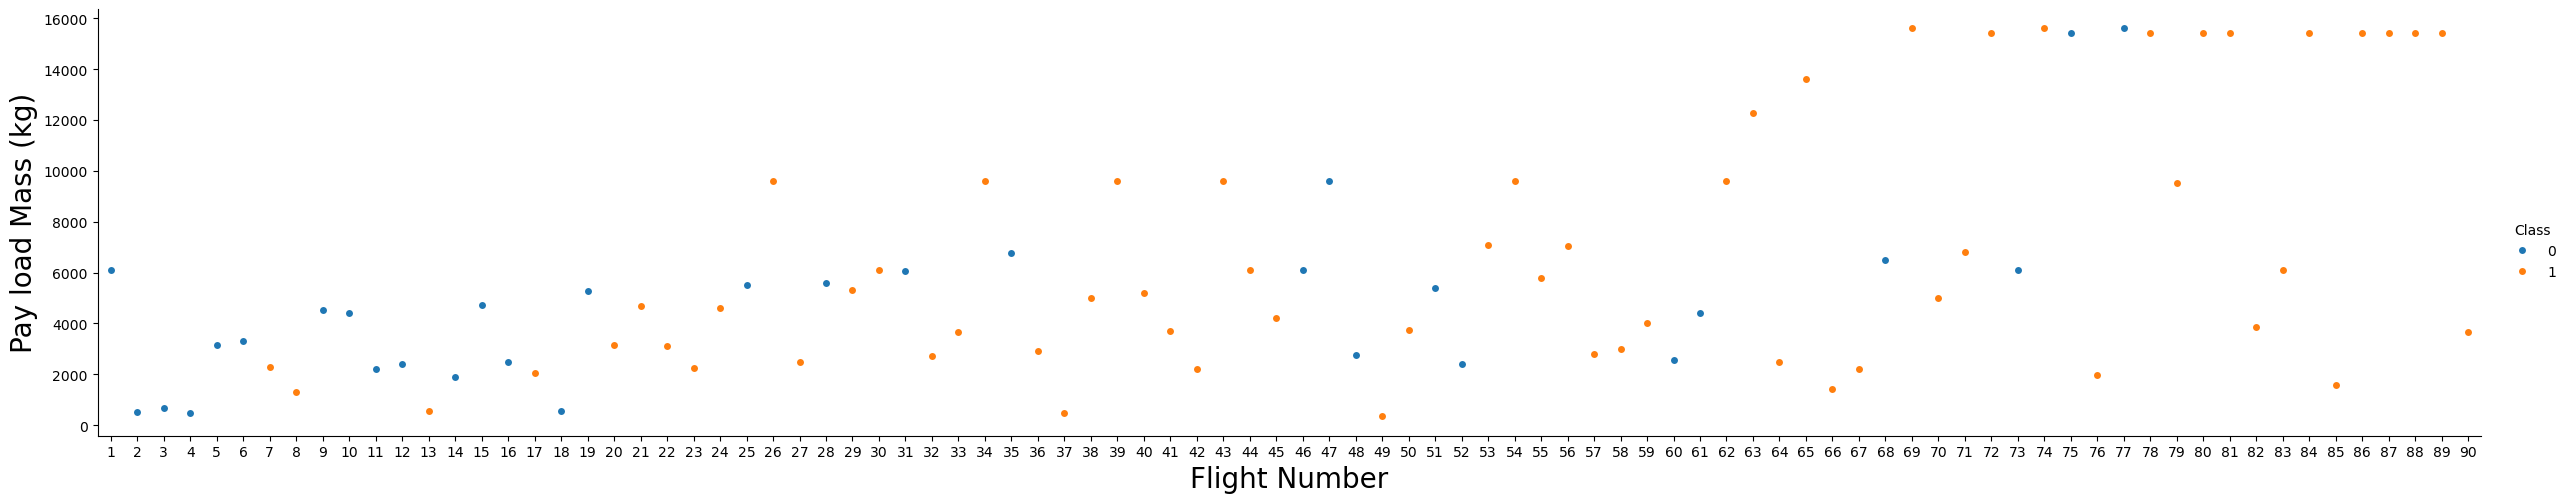

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that *different launch sites have different success rates*: <code>CCAFS LC-40</code> has a success rate of 60%, while <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> have a success rate of 77%.

Next, let's drill down to each site and visualize its detailed launch records.

### TASK 1: Visualize the relationship between Flight Number and Launch Site

Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>.

Set the parameter <code>x</code> to <code>FlightNumber</code>, parameter <code>y</code> to <code>Launch Site</code>, and parameter <code>hue</code> to <code>'class'</code>

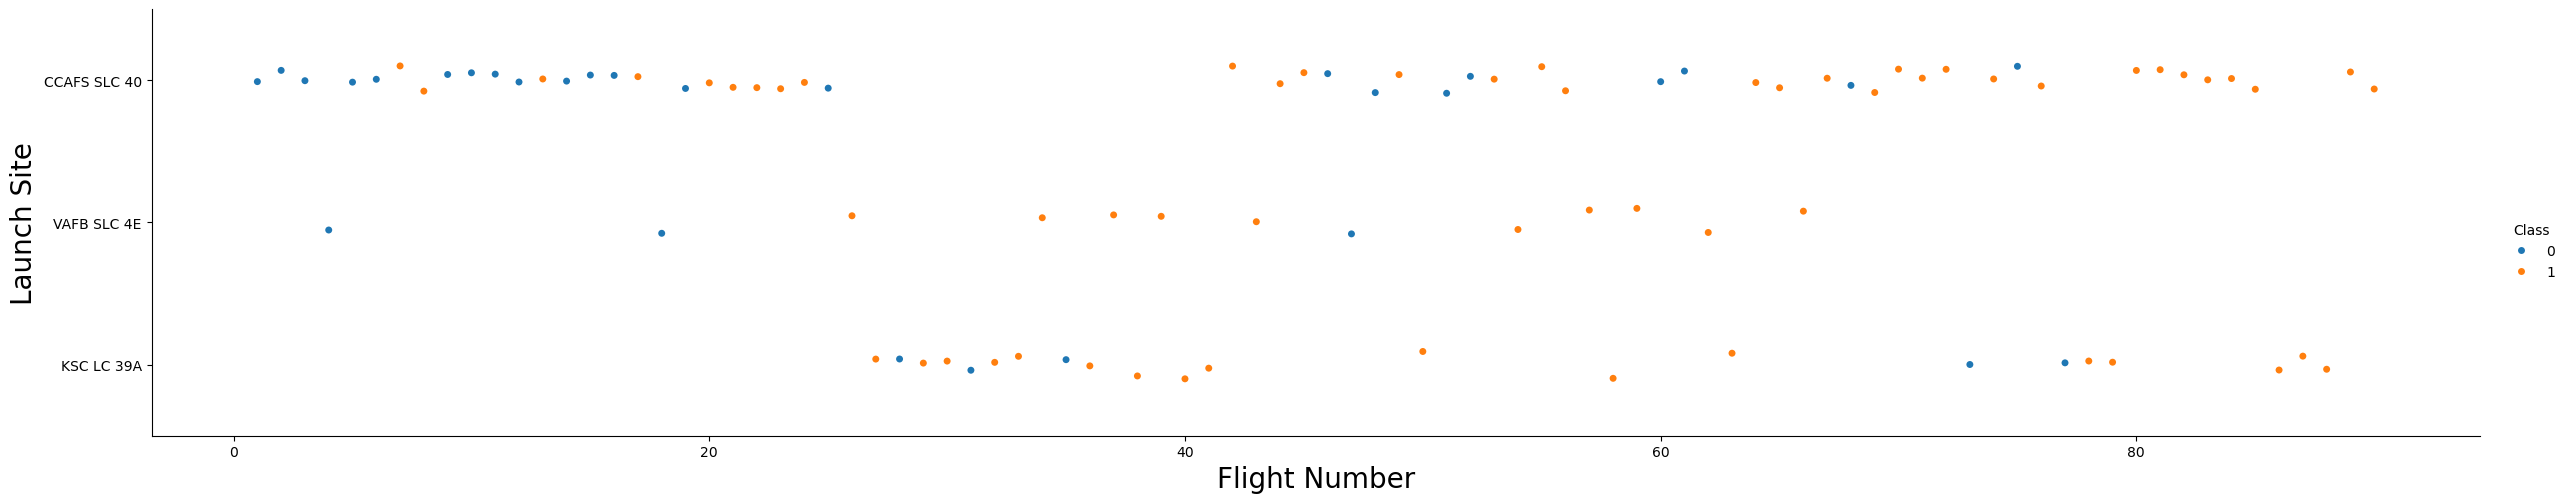

In [4]:
# Plot a scatter plot with x axis as Flight Number and y axis as Launch Site, and hue to be the class value:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots:

*There are more successful outcomes (Class 1, Red) for launch sites VAFB SLC 4E and KSC LC 39A, than for launch site CCAFS SLC 40*

### TASK 2: Visualize the relationship between Payload and Launch Site

We also want to check if there is any relationship between launch sites and their payload masses.

Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

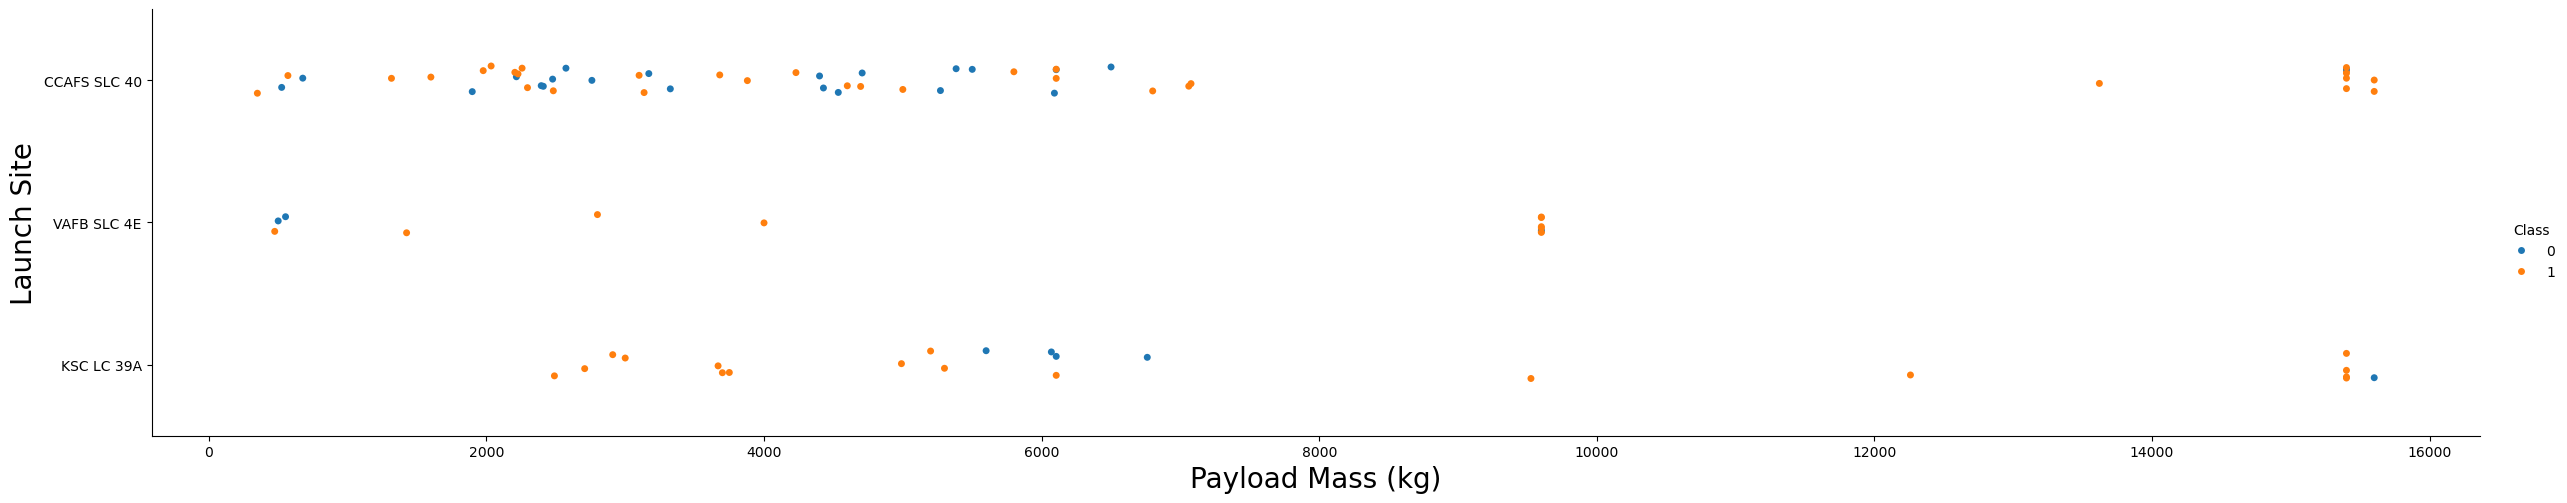

In [5]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Payload Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart, you will find for the VAFB-SLC  launchsite there are no rockets launched with heavy payload mass (greater than 10000).

### TASK 3: Visualize the relationship between success rate and orbit type

Next, we want to visually check if there is any relationship between success rate and orbit type.

Let's create a bar chart for the sucess rate for each orbit.

***HINT:*** Use `groupby` method on Orbit column and get the `mean` of Class column.

In [6]:
df_orbit = df[['Orbit', 'Class']]

df_orbit_gr = df_orbit.groupby(['Orbit']).mean()

df_orbit_gr

,Class
Orbit,
ES-L1,1.000000
GEO,1.000000
GTO,0.518519
HEO,1.000000
ISS,0.619048
LEO,0.714286
MEO,0.666667
PO,0.666667
SO,0.000000


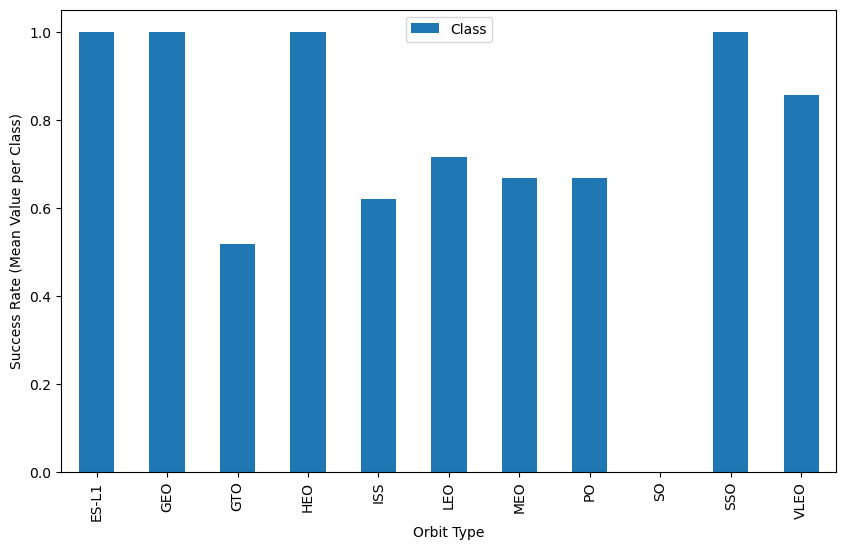

In [7]:
df_orbit_gr.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Orbit Type')
plt.ylabel('Success Rate (Mean Value per Class)') 
plt.show()

Analyze the plotted bar chart to determine which orbits have high sucess rate.

*Orbit types with highest success rate (=1) are: ES-L1, GEO, HEO, SSO.*  

### TASK 4: Visualize the relationship between FlightNumber and Orbit type

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.

Plot a scatter point chart with x = FlightNumber, y = Orbit, and hue = class value.

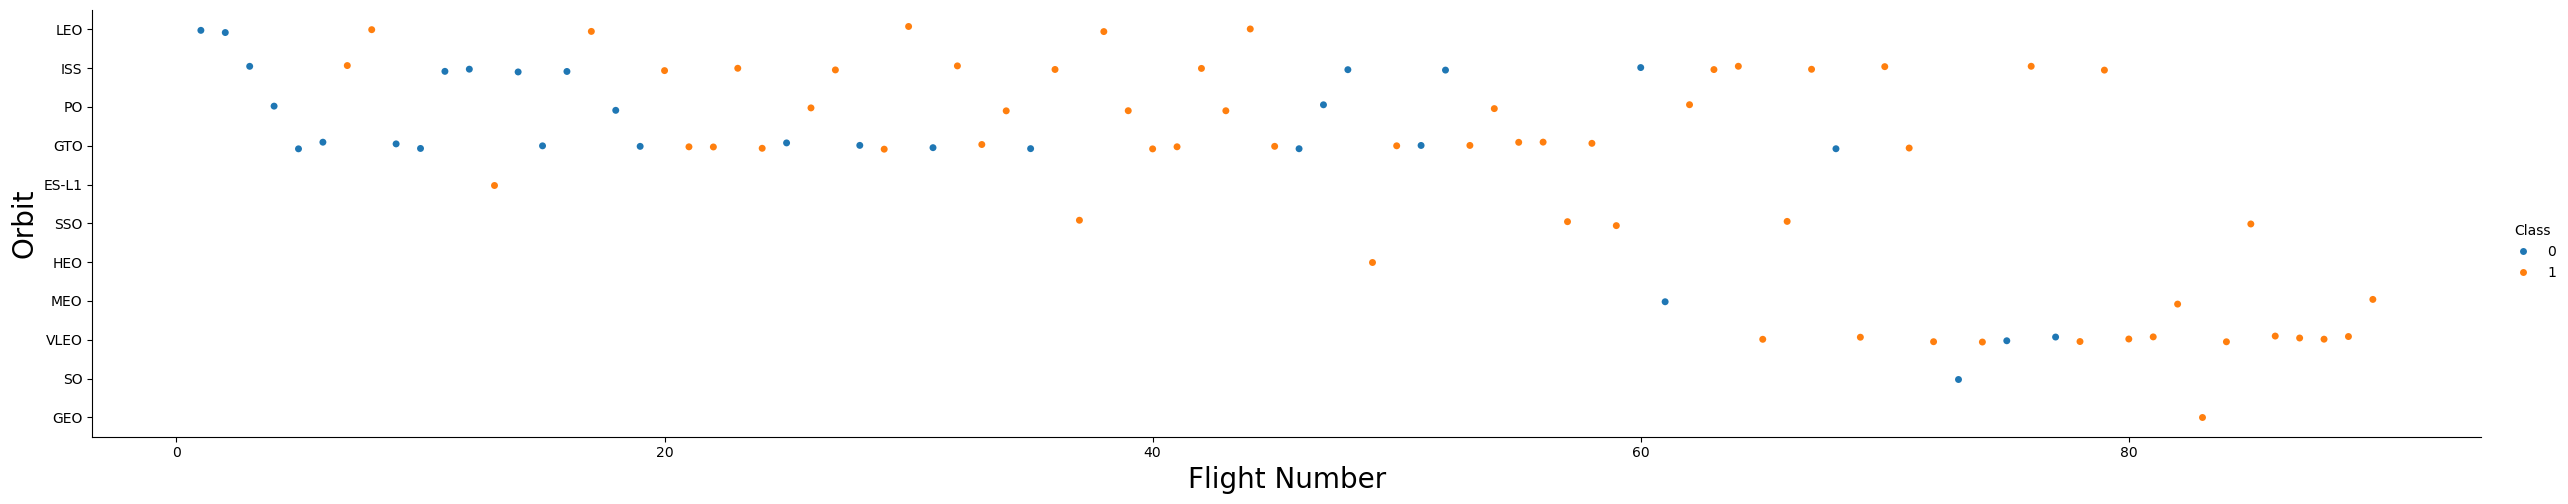

In [8]:
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

### TASK 5: Visualize the relationship between Payload and Orbit type

Similarly, we can plot the Payload vs. Orbit scatter point chart to reveal the relationship between Payload and Orbit type.

Plot a scatter point chart with x = Payload, y = Orbit, and hue = class value.

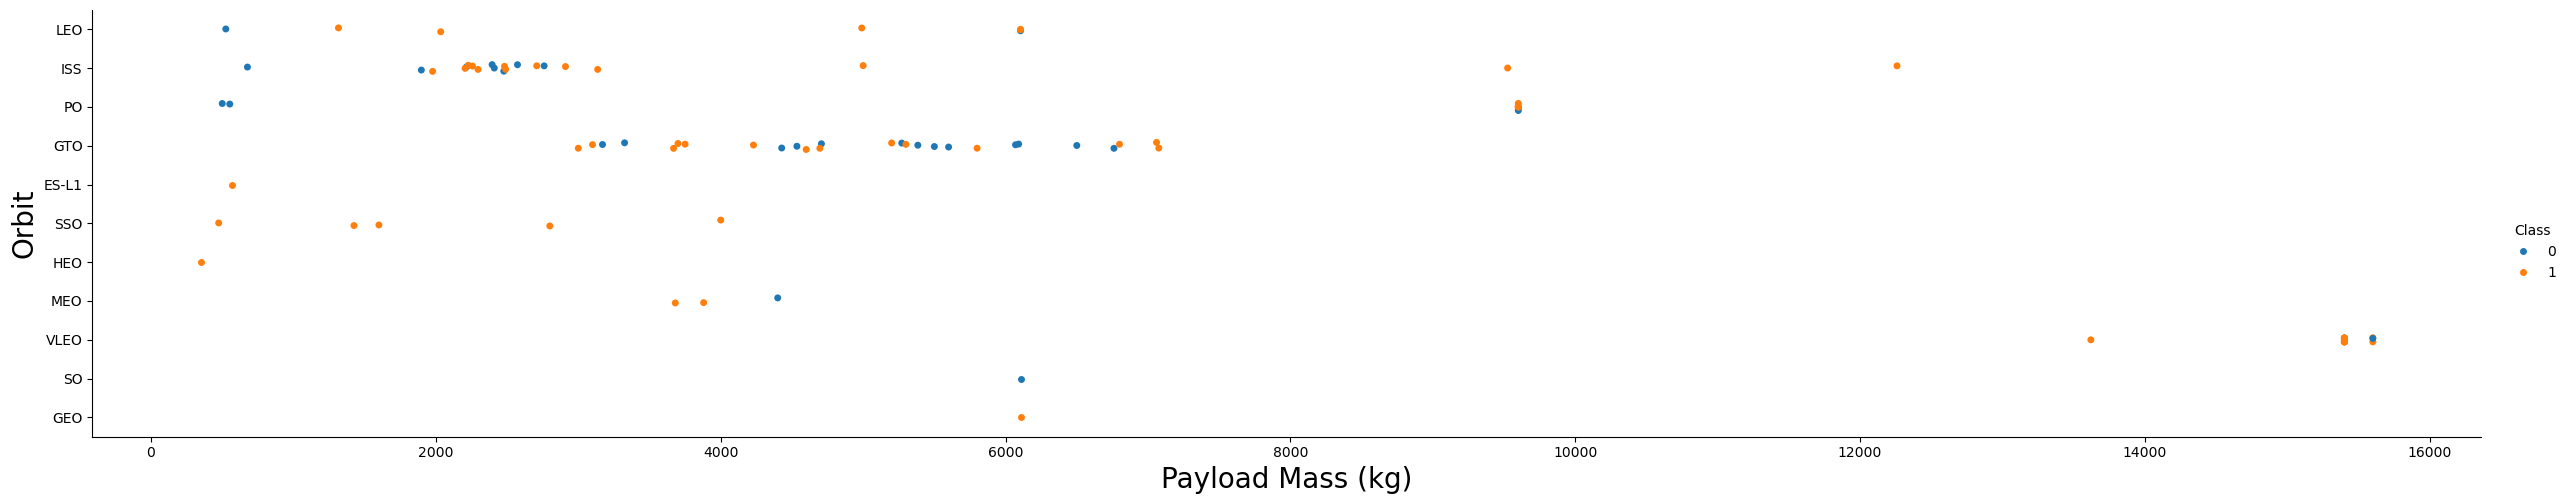

In [9]:
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Payload Mass (kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

With heavy payloads, the successful landing rate is higher for Polar, LEO, and ISS.

However, for GTO we cannot distinguish this as clearly since both positive and negative landings are common.

### TASK 6: Visualize the launch success yearly trend

You can plot a line chart with x = <code>Year</code> and y = `average success rate`, to get the average launch success trend.

The function below will help you get the year from the date:

In [10]:
# Function to extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [11]:
df_yearly = df[['Date', 'Class']]

df_yearly_gr = df_yearly.groupby(['Date']).mean()

df_yearly_gr

,Class
Date,
2010,0.000000
2012,0.000000
2013,0.000000
2014,0.333333
2015,0.333333
2016,0.625000
2017,0.833333
2018,0.611111
2019,0.900000


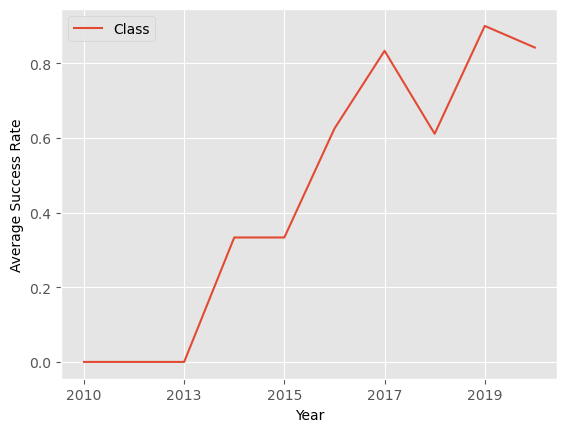

In [12]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use(['ggplot']) 

df_yearly_gr.plot(kind='line')

plt.ylabel('Average Success Rate')
plt.xlabel('Year')

plt.show()

You can observe that the sucess rate kept increasing from 2013 till 2020.

## Features Engineering

By now, you should obtain some preliminary insights about how each variable would affect the success rate.

We can select the features that will be used in success prediction in the future module.

In [13]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK 7: Create dummy variables to categorical columns

Use the function `get_dummies` and *features* dataframe to apply `OneHotEncoder` to the column Orbits, LaunchSite, LandingPad, and Serial. 

Assign the value to the variable `features_one_hot`, display the results using the method `head`. 

Your result dataframe must include all features including the encoded ones.

In [42]:
features_one_hot = pd.get_dummies(features[['Orbit', 'LaunchSite', 'LandingPad', 'Serial']])

In [43]:
features_one_hot = pd.concat([features_one_hot, features], axis=1)

In [44]:
# Drop original columns
features_one_hot.drop(['Orbit', 'LaunchSite', 'LandingPad', 'Serial'], axis = 1, inplace=True)

In [45]:
features_one_hot.head()

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1060,Serial_B1062,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,6104.959412,1,False,False,False,1.0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,2,525.000000,1,False,False,False,1.0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,3,677.000000,1,False,False,False,1.0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,4,500.000000,1,False,False,False,1.0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,5,3170.000000,1,False,False,False,1.0,0


### TASK 8: Cast all numeric columns to `float64`

In [46]:
features_one_hot = features_one_hot.astype('float64')

In [47]:
features_one_hot.dtypes

Orbit_ES-L1    float64
Orbit_GEO      float64
Orbit_GTO      float64
Orbit_HEO      float64
Orbit_ISS      float64
                ...   
GridFins       float64
Reused         float64
Legs           float64
Block          float64
ReusedCount    float64
Length: 80, dtype: object

We can now export the dataframe to a <b>CSV</b> for the next section, but to make the answers consistent, in the next lab we will provide data in a pre-selected range.

<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>